Kiki Chandra & Zoher Ghadyali

Data Science Spring 2016

CYOA Project

# OVERALL STORY

## Introduction

In this iPython notebook, we worked on building a model that would predict the sentiment of a given phrase, sentence, or word from a set of movie reviews on Rotten Tomatoes. The Kaggle competition that we were working on is linked here: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

We will begin our analysis by looking at the data and getting some key insights from visualizing the data. We then went through two rounds of model iteration. On our own, we were able to achieve our highest Kaggle score of 0.56008. In this project we had the opportunity to explore a wide variety of types of models and approaches to a very complex area of research: sentiment analysis. We found that certain models, such as the random forest classifier, worked better than using linear regression or multinomials. Areas of further research that we briefly touched on but would be interested in studying further include creating decision trees based on part of speech tags, or working with neural networks.

## What our data looks like

Below we display the dataset so that we have an idea of what we are working with. Each initial review on Rotten Tomatoes has gone through the Stanford phrase parser and the result of that parsing consists of the entire sentence, phrases within the sentence, and single words contained in the sentence.

In [2]:
#Import needed libraries and get data
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_table('train.tsv')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


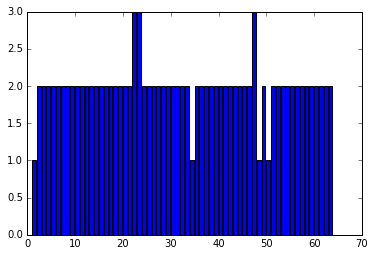

In [3]:
sent1 = data[data.SentenceId == 1]
x = sent1.PhraseId
y = sent1.Sentiment
plt.bar(x,y)
plt.show()

Looking at a plot of the sentiments of each phrase that is part of a sentence, it was immediately clear that the majority of the phrases are neutral, with two or three phrases with extreme sentiments (in either direction) determining if the overall sentence would be neutral, positive, or negative. That is definitely something to keep in mind moving forward. 

So now let's look at all of the train data and determine how many phrases we have of each sentiment. Below we plot a histogram of all the phrases by their sentiment. We also calculate and print out the percentage of the total data that is each sentiment.

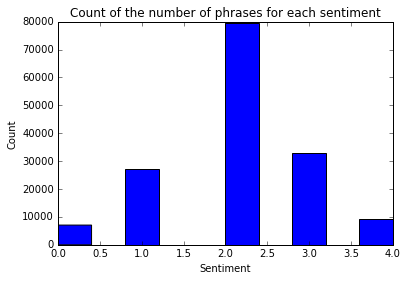

Sentiment:  0 Percentage:  0.0453159041394
Sentiment:  1 Percentage:  0.174759707805
Sentiment:  2 Percentage:  0.50994489299
Sentiment:  3 Percentage:  0.210989363065
Sentiment:  4 Percentage:  0.0589901320005


In [4]:
plt.hist(data.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of phrases for each sentiment')
plt.show()

for i in range(0, 5):
    print "Sentiment: ", i, "Percentage: ", len(data[data.Sentiment == i]) / float(len(data))

Below we create a subset of the data that only contains the single words in the data by checking for the presence of spaces in the phrase. We then create the same histogram as above for the number of single words for each sentiment. We see a lot more 2s because most single words do not provide enough context to actually have a positive or negative sentiment, with very few 1s and 3s and even fewer 0s and 4s. Again we print out the percentage of all of the single words that fall within each sentiment.

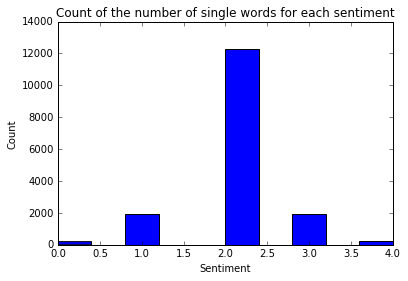

Sentiment:  0 Percentage:  0.0119170044159
Sentiment:  1 Percentage:  0.115842961708
Sentiment:  2 Percentage:  0.742786280322
Sentiment:  3 Percentage:  0.116145423749
Sentiment:  4 Percentage:  0.0133083298046


In [5]:
data["containsSpaces"] = data["Phrase"].apply(lambda x: ' ' in x)
sw = data[data.containsSpaces == False]

plt.hist(sw.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of single words for each sentiment')
plt.show()
for i in range(0, 5):
    print "Sentiment: ", i, "Percentage: ", len(sw[sw.Sentiment == i]) / float(len(sw))

Below we again create a subset of the data but this time we are only looking at the complete sentences. We expect to see more variation in the sentiment of the sentences than in the sentiments of the single words. Interestingly, as shown in the histogram below, we have more sentences with sentiments 0, 1, 3, and 4. This is where we started to get the idea that we should have separate models for sentences as opposed to single words and then group all of them together.

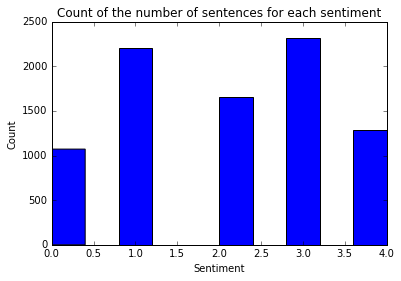

0 0.125688826357
1 0.257943486927
2 0.194043850393
3 0.272130378708
4 0.150193457615


In [6]:
sentences = data.groupby('SentenceId').first().reset_index()
plt.hist(sentences.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of sentences for each sentiment')
plt.show()
for i in range(0, 5):
    print i, len(sentences[sentences.Sentiment == i]) / float(len(sentences))

### Takeaways

If we look at the histograms of sentiment for the sentences and for the single words, we see very different distributions: for single words the majority have sentiment 2 and for sentences, the majority have sentiment 1 or 3. We will try and break our test data into subsets in our first iteration to build separate models for the words, the phrases, and the sentences in our test data.

## Model Iteration: Round 1

In this iteration of the model, building off of the results of our data exploration, we break our data up into subsets of single words, sentences, and phrases. We then apply a variety of different techniques to determine the sentiment of these different categories. We use a bag of words or tfidf approach primarily for sentences. For single words, we look for whether or not they are positive or negative from other sources. For phrases, we average the sentiments obtained from the single words.

### Bag of Words Model

Below we set up our train and test data so we can implement a bag of words model while still separating our data into sentences, phrases, and single words. Our review to words function parses the sentences and the phrases and removes punctuation, stopwords, and makes all of the words lowercase. We create a placeholder in our test data for sentiment and we create our subset of sentences from the train and test data.

In [7]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

def review_to_words( raw_review ):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops]   
    return( " ".join( meaningful_words ))   

train_df = pd.read_table('train.tsv')
test_df = pd.read_table('test.tsv')

test_df['Sentiment'] = -1 #a placeholder value, once we break up the test data into subsets, we can change this value
train_sentences = train_df.groupby('SentenceId').first().reset_index()
test_sentences = test_df.groupby('SentenceId').first().reset_index()
train_sentences["Phrase"] = train_sentences["Phrase"].apply(review_to_words)
test_sentences["Phrase"] = test_sentences["Phrase"].apply(review_to_words)

We use the tfidf vectorizer and a multinomial Naive Bayes model to fit the data. We have a very low accuracy from this model and one interesting thing to note is that this model predicts a majority of the sentences in the test dataset as 1s and 3s. There are not a lot of parameters to play around with in this model but this is very interesting behavior because we could get a baseline Kaggle score just by guessing 2 for every sentence, phrase, and single word, which we do later in this notebook.

Accuracy 0.392437801424


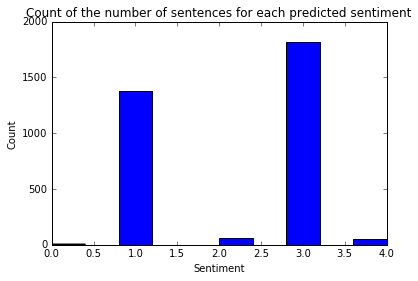

Sentiment:  0 Percentage:  0.00211480362538
Sentiment:  1 Percentage:  0.415709969789
Sentiment:  2 Percentage:  0.0190332326284
Sentiment:  3 Percentage:  0.548640483384
Sentiment:  4 Percentage:  0.014501510574


In [8]:
vectorizer = TfidfVectorizer()
vectorizer.fit(train_sentences.Phrase)

train_sentences_features = vectorizer.transform(train_sentences.Phrase)
test_sentences_features = vectorizer.transform(test_sentences.Phrase)

clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
scores = cross_validation.cross_val_score(clf, train_sentences_features, train_sentences["Sentiment"], cv=10)
print "Accuracy", scores.mean()

clf = clf.fit(train_sentences_features, train_sentences["Sentiment"])
result = clf.predict(test_sentences_features)
sentences = pd.DataFrame(data={"PhraseId":test_sentences["PhraseId"], "Sentiment":result})

plt.hist(sentences.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of sentences for each predicted sentiment')
plt.show()
for i in range(0, 5):
    print "Sentiment: ", i, "Percentage: ", len(sentences[sentences.Sentiment == i]) / float(len(sentences))

We find the single words in the data in the same way that we did during our data exploration. We then downloaded two .txt files from UNC that contain positive and negative words. In predicting the sentiment for the single words, we look to see if the given word is in either of these lists and assign it a 1 or a 3 if it is in the negative or positive list respectively. We do not assign 0s or 4s assuming that no single word has an exteme positive or negative sentiment without context. If the word is not in either list, we assign it a 2.

We plot a histogram of the sentiment for the single words and we find that 83% of the single words have a sentiment of 2 which makes sense given that the positive and negative word text files only contain 3000 words each. Most words are probably not in either list and so given a sentiment of 2. We do find that 16% of single words are contained in one of these lists and, unsurprisingly, there are 0 words with a sentiment of 0 or 4.

Finally, we merge the sentiments that our tfidf model predicted for the sentences with the sentiments predicted for the single words. This lets us now find all remaning phrases that we haven't yet predicted the sentiment for and, once we do predict their sentiment, we can merge that dataframe into this merged one to have predictions for all of the test data.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


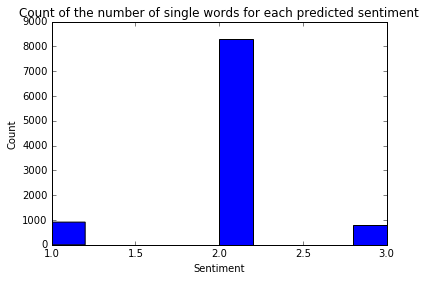

Sentiment:  0 Percentage:  0.0
Sentiment:  1 Percentage:  0.0913720790893
Sentiment:  2 Percentage:  0.830037946874
Sentiment:  3 Percentage:  0.0785899740363
Sentiment:  4 Percentage:  0.0


In [9]:
negWords = open("negative.txt").read().split("\n")
posWords = open("positive.txt").read().split("\n")

test_df["containsSpaces"] = test_df["Phrase"].apply(lambda x: ' ' in x)
test_sw = test_df[test_df.containsSpaces == False]

def get_sentiment_single_word(word):
    """Takes in as input a single word, checks if the word is in two text files we downloaded of negative and positive
    words, and returns the corresponding value. We use 1 and 3 instead of 0 and 4 because we assume no single word can
    have an extremely negative or positive sentiment."""
    if word in negWords:
        return 1
    elif word in posWords:
        return 3
    else:
        return 2
    
test_sw['Sentiment'] = test_sw['Phrase'].apply(get_sentiment_single_word)

sw = test_sw[['PhraseId', 'Sentiment']]

plt.hist(sw.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of the number of single words for each predicted sentiment')
plt.show()
for i in range(0, 5):
    print "Sentiment: ", i, "Percentage: ", len(sw[sw.Sentiment == i]) / float(len(sw))

merged1 = pd.merge(sentences, sw, how='outer') #outer gets all rows from both dataframes which is what we want to
                                               #produce all the rows we need in the test data

We now get all the remaning phrases that we have not yet predicted the sentiment for in the test data and we clean them. We create a dictionary using the dataframe we created of the single words to essentially use as a lookup table. We loop through the words in each phrase, get their sentiment from the dictionary or, if they aren't in the dictionary add a 2, and then average the list. If the list is empty, we return a 2.

We then merge the remaining phrases with our previous merged data frame that contained our sentences and single words. We print out the length of the data frame after this merge to ensure that we have calculated the sentiment for all of the rows in the test data.

In [10]:
remainingPhrases = test_df[~test_df['PhraseId'].isin(merged1['PhraseId'])].reset_index()
remainingPhrases["Phrase"] = remainingPhrases["Phrase"].apply(review_to_words)

sw_dict = test_sw.set_index('Phrase')['Sentiment'].to_dict()

def get_sentiment_phrase(phrase):
    phrase_sentiment = []
    for word in phrase.split():
        if word in sw_dict:
            phrase_sentiment.append(sw_dict[word])
        else:
            phrase_sentiment.append(2)
    if len(phrase_sentiment):
        return sum(phrase_sentiment)/len(phrase_sentiment)
    else:
        return 2

remainingPhrases['Sentiment'] = remainingPhrases['Phrase'].apply(get_sentiment_phrase)
phrases = remainingPhrases[['PhraseId', 'Sentiment']]
merged2 = pd.merge(merged1, phrases, how='outer')
print len(merged2)

66292


Now that we have verified that we have predicted the sentiment for all of the phrases, sentences, and single words in the test data, we sort by PhraseId, ensure that the PhraseId and Sentiments are stored as integers and not as strings, and output the result as a csv.

In [11]:
final = merged2.sort_values(by='PhraseId')
final['PhraseId'] = final['PhraseId'].apply(lambda x: int(x))
final['Sentiment'] = final['Sentiment'].apply(lambda x: int(x))
final.to_csv( "ZG_rotten_tomatoes_model1.csv", index=False, quoting=3 )

This csv file got a Kaggle score of 0.52572. This method is somewhat difficult to interpret because we cannot gauge the accuracy of our models separately. We do not know if our bag of words model is very accurate or if our functions for single words and phrases is good. In our next iteration of the model, we will try and make the model less opaque and make the single words more meaningful in terms of predicing the sentiment for phrases and sentences.

## Model Iteration: Round 2 <br>
One of the final models we developed was geared towards using parts of speech and negation words to see how accurately we could use them to predict sentiment. We mainly focused on running analysis on phrases, rather than on everything, because of runtime. We did a lot of research through papers (such as http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5212278) and online videos to learn about different methods that are currently being used for sentiment analysis, and what some interesting techniques people have used are. The bag of words model, which we used previously, came up a lot, as did using the TF-IDF model and creating decision trees. Another interesting area of research is figuring out how to use parts of speech and negation words effectively. For example, a sentence such as "I loved the movie even though the plot was not steller" has an overall positive sentiment, but the relationship between the negation words ('even','though','not') and the adjectives ('loved','stellar') is complicated to analyse. We tried to focus on this area in our next model, to see how we could use these relationships to correctly predict sentiment.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.tag.perceptron import PerceptronTagger
import nltk
import cPickle

#reading table, creating sentences data frame
train = pd.read_table('train.tsv')
train_sentences = train.groupby('SentenceId').first().reset_index()

#creating new column length (number of words) and ordering data frame by length and sentence id
train["Length"] = train['Phrase'].apply(lambda x: len(x.split()))
ordered = train.sort(['SentenceId', 'Length'], ascending=[1, 0])

#binning rows into categories 
max_length = max(ordered['Length'])
bins = [0, 1, max_length/15, max_length/4, max_length/2, max_length]
group_names = ['SingleWord', 'SmallPhrase', 'Phrase', 'LongPhrase', 'Sentences']
categories = pd.cut(ordered['Length'], bins, labels=group_names)
ordered['categories'] = pd.cut(ordered['Length'], bins, labels=group_names)

tagger = PerceptronTagger()  #loading part of speech tagger to save time

print bins[::-1]

[52, 26, 13, 3, 1, 0]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


We split the data into different categories by bins and created a data frame of single words. Then, we went through the steps of cleaning and parsing the words, assigning parts of speech to each word and creating a column 'POS' to store that value. We then trained a random forest classifier on this data frame. All of this code can be found in the ipython notebook 'kc_model_iteration_2', but for clarity we simply saved the resulting data frame as a .csv file and loaded it. 

In [14]:
singleword = pd.read_csv('singleword.csv')
singleword

,Unnamed: 0,index,PhraseId,SentenceId,Phrase,Sentiment,Length,categories,POS
0,0,3,4,1,A,2,1,SingleWord,['DT']
1,1,4,5,1,series,2,1,SingleWord,['NN']
2,2,6,7,1,of,2,1,SingleWord,['IN']
3,3,8,9,1,escapades,2,1,SingleWord,['NNS']
4,4,11,12,1,demonstrating,2,1,SingleWord,['VBG']
5,5,13,14,1,the,2,1,SingleWord,['DT']
6,6,14,15,1,adage,2,1,SingleWord,['NN']
7,7,16,17,1,that,2,1,SingleWord,['IN']
8,8,18,19,1,what,2,1,SingleWord,['WP']
9,9,20,21,1,is,2,1,SingleWord,['VBZ']


With the singleword table from the train data, we then loaded the test data and created the same length column and ordered the dataset.<br>
We ran the forest model only on the test single words in order to get their sentiment, and use that for developing phrases and sentences; this dataframe, singleword_test, is also loaded here as a .csv. 
The next data frame we created was test_phrases, which contains all the rows that do not have full sentences or single words. This is also loaded as a .csv.

In [ ]:
test = pd.read_table('test.tsv')
test["Length"] = test['Phrase'].apply(lambda x: len(x.split()))
ordered = test.sort(['SentenceId', 'Length'], ascending=[1, 0])

In [15]:
singleword_test = pd.read_csv('singleword_test.csv')
test_phrases = pd.read_csv('test_phrases.csv')

In [ ]:
import re, string

test_phrases['SentPOS'].tolist()
pattern = re.compile('[\W_]+')
length = test_phrases['SentPOS'].size

predicted_sent = []

for i in xrange(48000,length):
    print 'index: ',i
    raw_order = pattern.sub(' ', test_phrases['SentPOS'][i])
    order = raw_order.replace('\[\[\]\]', '').split()
    str_to_int = [int(i) if i.isdigit() else i for i in order]
    test = [tuple(str_to_int[i:i+2]) for i in range(0, len(str_to_int),2)]
    overall_sent = 0
    reverse = {0:4,1:3,2:2,3:1,4:0}
    rev = False
    count = 0
    pos_words = 0
    neg_words = 0
    affected = ['RB','RBR','RBS','JJS','JJR','JJ']
    for pair in test:
        try:
            init_val = pair[0]
            if init_val == 2:
                continue
            else:
                count += 1
                #print len(pair),init_val,'--------------'
                if pair[1] == 'NEGATE':
                    print 'reversing'
                    val = reverse[pair[0]]
                    rev = not rev
                else:
                    if rev:
                        if pair[1] in affected:
                            print 'affected'
                            val = reverse[init_val]
                    else:
                        val = init_val
                    if val == 3 or val == 4:
                        pos_words += 1
                    else: 
                        neg_words += 1
                overall_sent += val
        except: 
            continue
    print count, pos_words, neg_words
    if ((len(test) > 2 and count > 2) or (len(test) < 3 and count > 0)) and pos_words != neg_words:
        if neg_words == 0:
            sentiment = 4
        elif pos_words == 0:
            sentiment == 0
        else:
            sentiment = int(round(overall_sent/float(count)))
    else:
        sentiment = 2
    test_phrases['Sentiment'][i] = sentiment
    print 'sentiment: ',test_phrases['Sentiment'][i], ' id: ',test_phrases['PhraseId'][i]
    #print sentiment
    predicted_sent.append(sentiment)
test_phrases

The code above is where a majority of time was spent, both in running and developing. Essentially, we go through each word in a phrase of test_phrases, and check the part of speech. If the word is tagged as a 'NEGATE' word (it appears in a list of words which commonly flip the meaning of the sentence, such as 'but' and 'however'), the sentiment of the adjectives and adverbs is reversed until the phrase ends or another negation word is met. We got the idea from the paper that is linked above, which gives models such as this as an example of how part of speech can be used. It was a pretty basic interpretation of the relationship between negation words and part of speech, but it actually worked surprisingly well. <br>

We took a sum of the sentiments of each word in the phrase (using the above description, and disregarding neutral words). If the sum was smaller than a certain cut-off, relative to the phrase length, or the amount of positive sentiments and negative sentiments was equal, then we assign an overall sentiment value of two. If those conditions are not met, we then do further checks to see if the sentence is overall more positive of more negative, and assign a sentiment accordingly. 

In [16]:
#function to clean phrases in test_sentences
def basic_clean( raw_review ):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    words = letters_only.lower().split()
    return words

For sentences, we tried a few different models to see which gave the best accuracy. 
* Averaging the sentiments of each phrase in a sentence for the phrases that exist, otherwise going through and using the same code as above on the remaining sentences, using the test single words as a lookup table: accuracy - 0.521
* Doing the same as the previous bullet point, but using the train single words as a lookup table: accuracy - 0.517
* Not using phrase sentiment averages, but using the test single words as a lookup table for every sentence: accuracy - 0.551
* Doing the same as the previous bullet point, but using the train single words as a lookup table: accuracy - 0.532

Interestingly, the third bullet point performed significantly better. We could not think of too many valid reasons that the test single words would produce more accurate results, except that it indicates that the way the sentence is being parsed with word sentiment needs more improvement. Also, the improved performance when not using the phrase sentiments also points to our model for phrases being too simplistic. 

In [ ]:
test_sentences['Sentiment'] = 2
sentences_amt = test_sentences['Sentiment'].size
negations = ['than','however','but','although','not','no','neither','never','noone','nobody','none','nor','nothing','nowhere','hardly','scarcely','isn','wasn','didn']
reverse = {0:4,1:3,2:2,3:1,4:0}

for i in xrange(0,sentences_amt):
    sent_id = test_sentences['SentenceId'][i]
    sent = test_sentences['Sentiment'][i]
    sentiment = 0
    phrase = basic_clean(test_sentences['Phrase'][i])
    rev = False
    neg_count = 0
    pos_count = 0
    count = 0
    for word in phrase:
        try:
            sw = singleword[singleword.Phrase == word]
            word_sent = int(sw.Sentiment)
            if word in negations:
                rev = not rev
                word_sent = reverse[word_sent]
            if word_sent == 0 or word_sent == 1:
                neg_count +=1
                count +=1
            elif word_sent == 3 or word_sent == 4:
                pos_count +=1
                count+=1
            else:
                continue
            sentiment += int(word_sent)
        except:
            continue
    if count > 2 and neg_count != pos_count:
        if pos_count > neg_count:
            if neg_count == 0:
                sent = 4
            else:
                sent = 3
        elif neg_count > pos_count:
            if pos_count == 0:
                sent = 0
            else:
                sent = 1
        else:
            sent = int(round(sentiment/len(count)))
    test_phrases['Sentiment'][i] = sent
    print 'index: ',test_sentences['PhraseId'][i],sent

In [ ]:
len(test_sentences[test_sentences.Sentiment != 2])
print len(test_sentences),len(singleword_test),len(test_phrases),len(test)

3310 10014 52968 66292

In [ ]:
df = pd.merge(test_sentences, test_phrases, how='outer')
remaining = test[~test['PhraseId'].isin(df['PhraseId'])].reset_index()
remaining['Sentiment'] = 2
df1 = pd.merge(df, remaining, how='outer')
df2 = df1.sort(['PhraseId']).reset_index(drop=True)
df2

In [ ]:
df2["PhraseId"] = df2["PhraseId"].apply(lambda x : int(x))
df2["Sentiment"] = df2["Sentiment"].apply(lambda x : int(x))
print len(df2)

66292

In [ ]:
output = pd.DataFrame(data={"PhraseId":df2["PhraseId"], "Sentiment":df2['Sentiment']})

# Use pandas to write the comma-separated output file
output.to_csv( "rotten_tomatoes_model1.csv", index=False, quoting=3 )

With this model, the highest accuracy we could achieve was 0.551.

## Further Work

Regarding predicting single word sentiment in a better way, it would be interesting to use NLTK's similar() function, which groups words based on similarity (ie synonyms, collocations), and using that on the train data and test data in order to find information about the sentiments of words that are similar, and create a model based off of that. Additionally, pointwise-mutual information could be used to find collocations and word information without using the nltk function.

Another area of sentiment analysis that we could explore is classification, which uses cross entropy and total 
surprisal in order to classify texts. We could train models that are super positive, positive, neutral, negative, and super negative, and run each test phrases through them to compute the most likely classification (the one with the lowest cross entropy).

Finally, doing more extensive research into how negation words impact parts of speech would also be very valuable.

## Sources

http://www.nltk.org/book/ch05.html

http://arxiv.org/pdf/1511.09107.pdf

http://nealcaren.web.unc.edu/an-introduction-to-text-analysis-with-python-part-3/

http://www.unc.edu/~ncaren/haphazard/negative.txt

http://www.unc.edu/~ncaren/haphazard/positive.txt

https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

https://www.codementor.io/python/tutorial/data-science-python-r-sentiment-classification-machine-learning

http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5212278